# 2.6 Zbiór danych: przewidywanie transakcji
Problem klasyfikacji za pomocą drzew decyzyjnych omówimy za pomocą zbioru danych Online Shoppers Purchasing Intention. Na początek przyjrzyjmy się z jakich informacji właściwie się składa.

In [1]:
import pandas as pd

In [ ]:
purchases_df = pd.read_csv("../data/online_shoppers_intention.csv")
purchases_df.T

In [5]:
purchases_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


Zobaczmy jak rozkładają się wartości poszczególnych cech ze względu na pole Revenue, ponieważ to właśnie jest zmienna celu, czyli będziemy chcieli przewidywać które sesje mogą zakończyć się zakupem.

In [6]:
import matplotlib.pyplot as plt

/tmp/ipykernel_3833/3641667791.py:2: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  purchases_df.boxplot(by="Revenue", ax=ax.reshape(-1)[:-1])


array([<Axes: title={'center': 'Administrative'}, xlabel='[Revenue]'>,
       <Axes: title={'center': 'Administrative_Duration'}, xlabel='[Revenue]'>,
       <Axes: title={'center': 'BounceRates'}, xlabel='[Revenue]'>,
       <Axes: title={'center': 'Browser'}, xlabel='[Revenue]'>,
       <Axes: title={'center': 'ExitRates'}, xlabel='[Revenue]'>,
       <Axes: title={'center': 'Informational'}, xlabel='[Revenue]'>,
       <Axes: title={'center': 'Informational_Duration'}, xlabel='[Revenue]'>,
       <Axes: title={'center': 'OperatingSystems'}, xlabel='[Revenue]'>,
       <Axes: title={'center': 'PageValues'}, xlabel='[Revenue]'>,
       <Axes: title={'center': 'ProductRelated'}, xlabel='[Revenue]'>,
       <Axes: title={'center': 'ProductRelated_Duration'}, xlabel='[Revenue]'>,
       <Axes: title={'center': 'Region'}, xlabel='[Revenue]'>,
       <Axes: title={'center': 'SpecialDay'}, xlabel='[Revenue]'>,
       <Axes: title={'center': 'TrafficType'}, xlabel='[Revenue]'>,
       <Axes:

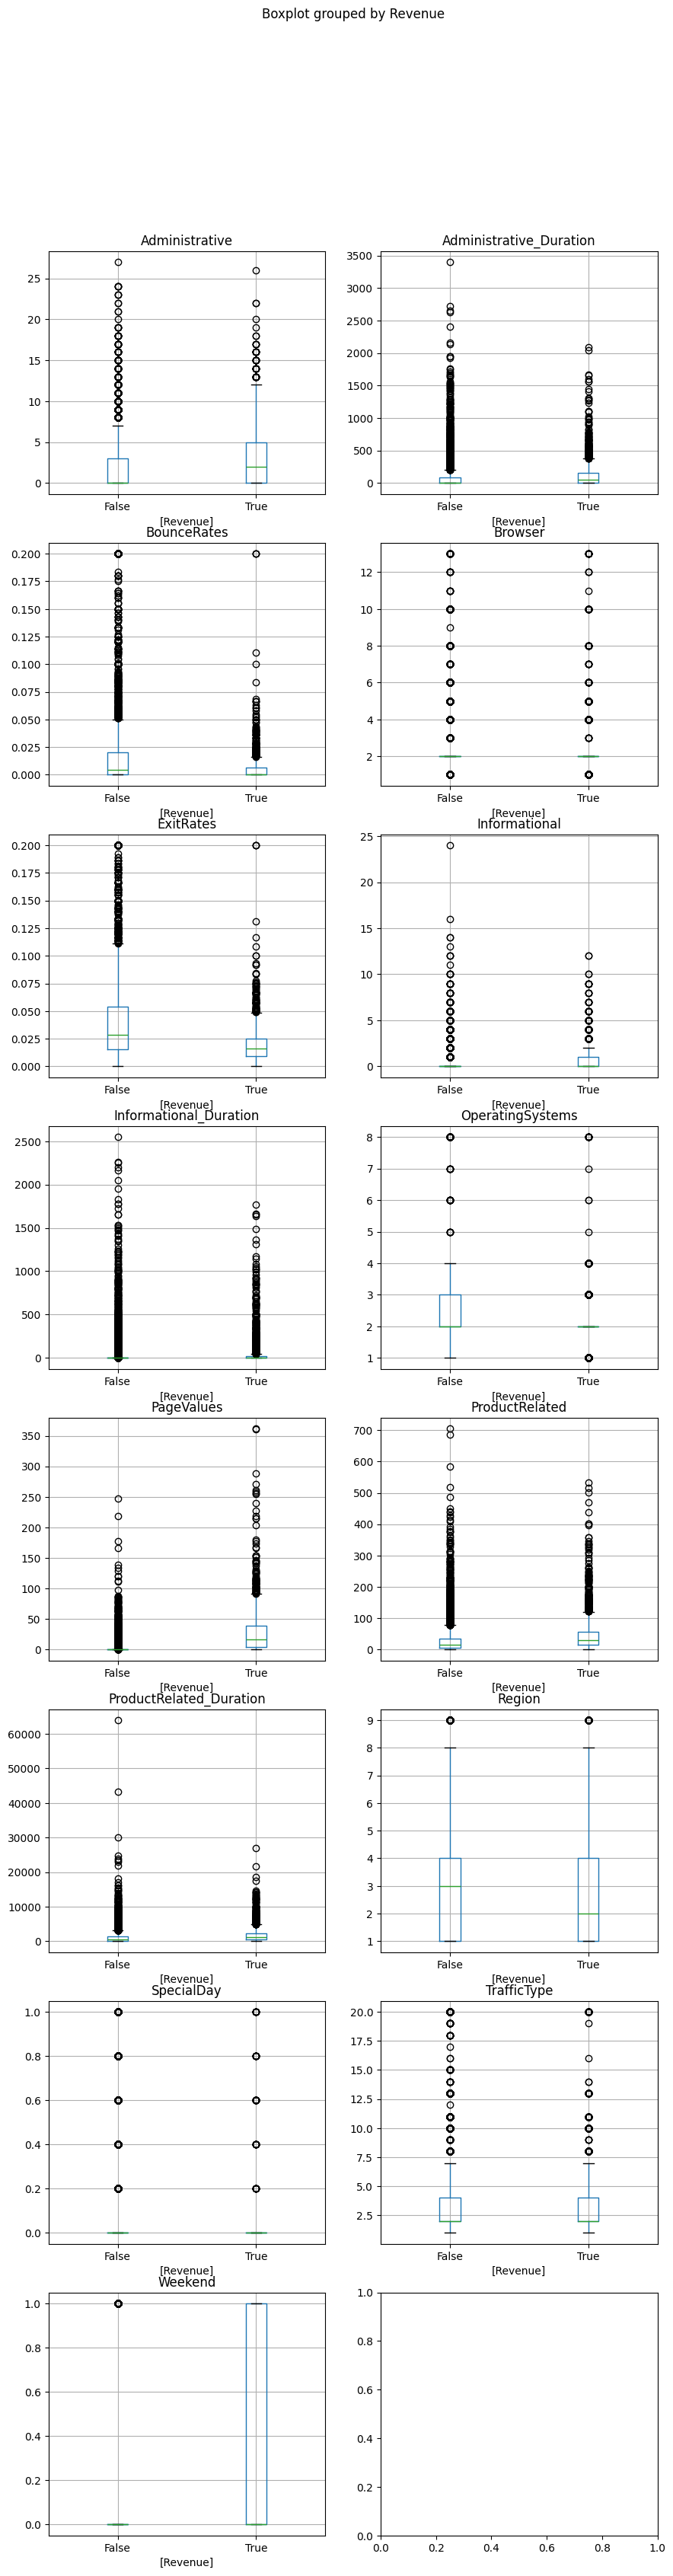

In [7]:
_, ax = plt.subplots(8, 2, sharey=False, figsize=(10, 40))
purchases_df.boxplot(by="Revenue", ax=ax.reshape(-1)[:-1])

In [11]:
df_numeric = purchases_df.select_dtypes(include=[int, float, bool])
df_numeric

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,1,1,1,1,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,1,2,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,4,1,9,3,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,3,2,2,4,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,3,3,1,4,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,4,6,1,1,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,3,2,1,8,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,3,2,1,13,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,2,2,3,11,False,False


In [12]:
df_numeric.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


Najwyższą bezwględną wartość korelacji ze zmienną Revenue mają pola PageValues więc rzućmy okiem jak prezentuje się nasz wykres ograniczony do tych dwóch wymiarów.

In [14]:
purchases_df.astype({"Revenue": "int8"})

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,0
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,0
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,0
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,0
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,0


<Axes: xlabel='PageValues', ylabel='ExitRates'>

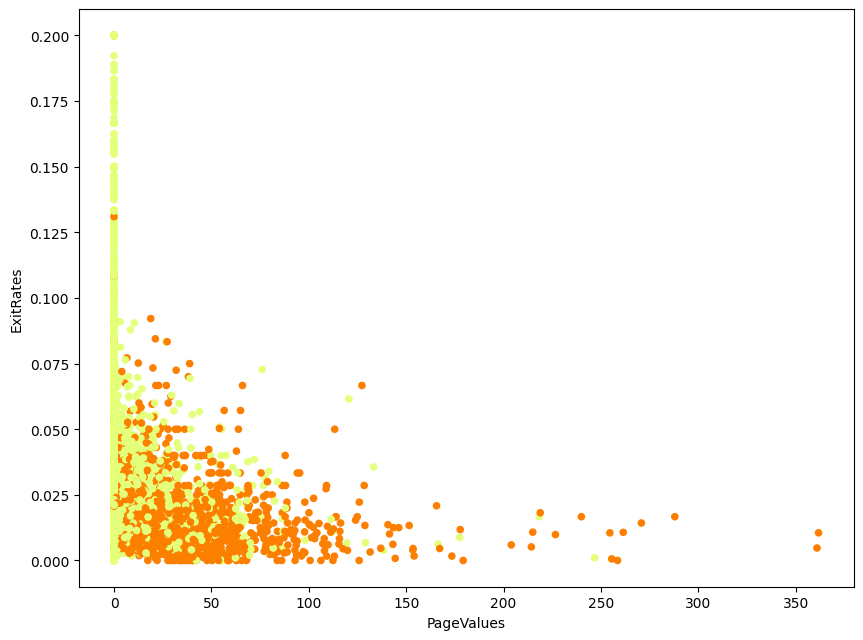

In [15]:
purchases_df.astype({"Revenue": "int8"}).plot.scatter(x="PageValues", y="ExitRates", c="Revenue", cmap="Wistia", colorbar=False, figsize=(10, 7.5), legend=True)

Nasze dane zawierają też dość enigmatyczne informacje o systemie operacyjnym, przeglądarce, rejonie pochodzenia danej osoby czy rodzaju ruchu jaki ona generuje (możemy się domyślać o np. wejście z sieci społecznościowej czy bezpośrednio na stronę). Warto więc przyjrzeć się dokładniej tym wartościom.

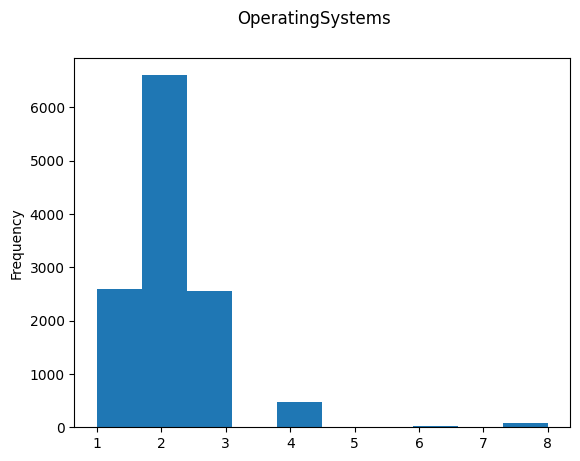

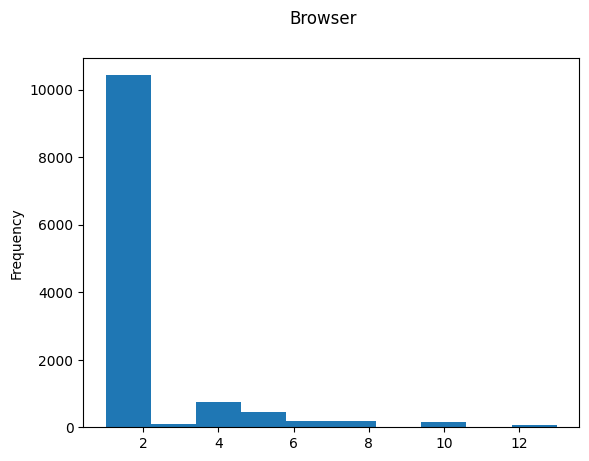

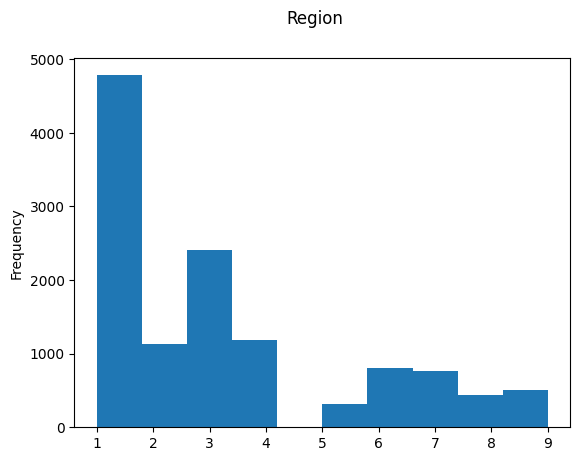

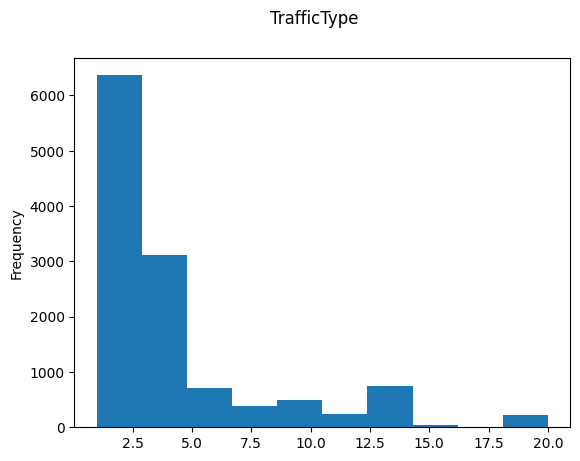

In [16]:
columns = ["OperatingSystems", "Browser", "Region", "TrafficType"]
for column in columns:
    purchases_df[column].plot.hist(subplots=True, title=column)
    plt.show()

Pomimo tego, że są to wartości numeryczne, musimy traktować je jak kategorie, gdyż nie jesteśmy w stanie wprowadzić między nimi relacji większości.

### Zbalansowanie klas
Zobaczmy jeszcze jak wiele przykładów zawiera każda z klas.

In [17]:
purchases_df["Revenue"].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64